**IMPORTING LIBRARIES**

In [3]:
import pandas as pd
import numpy as np

- Importing data into dataframe from csv

In [4]:
df=pd.read_csv("Patient_Health_Data.csv")

- Reading First 5 rows of the dataset

In [5]:
df.head(5)

,Patient_ID,Height_cm,Weight_kg,Blood_Pressure,Temperature_C,Heart_Rate,Symptoms,Existing_Conditions,Disease_Predictions,Laboratory_Test_Results,Cholesterol_mg_dL,Blood_Sugar_mg_dL,Family_History_Heart_Disease,Smoking_Status
0,P0001,174.0,59.0,120/80,36.6,63.0,chest pain,Diabetes,Heart Disease,High Cholesterol,198.0,79.0,Yes,Never
1,P0002,NaN,67.0,130/85,37.0,68.0,shortness of breath,Hypertension,Coronary Artery Disease,NaN,179.0,90.0,No,Former
2,P0003,176.0,58.0,140/90,37.0,65.0,fatigue,High Cholesterol,Arrhythmia,Normal,193.0,82.0,NaN,Current
3,P0004,185.0,65.0,125/82,37.2,69.0,dizziness,NaN,NaN,NaN,228.0,103.0,No,Never
4,P0005,167.0,41.0,135/88,36.3,72.0,palpitations,Asthma,Hypertension,NaN,251.0,135.0,Yes,Former


- Finding columns name

In [6]:
df.columns

Index(['Patient_ID', 'Height_cm', 'Weight_kg', 'Blood_Pressure',
       'Temperature_C', 'Heart_Rate', 'Symptoms', 'Existing_Conditions',
       'Disease_Predictions', 'Laboratory_Test_Results', 'Cholesterol_mg_dL',
       'Blood_Sugar_mg_dL', 'Family_History_Heart_Disease', 'Smoking_Status'],
      dtype='object')

- Finding number of ROWS and COLUMNS

In [7]:
df.shape

(2000, 14)

- Basic info of data

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 14 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Patient_ID                    2000 non-null   object 
 1   Height_cm                     1915 non-null   float64
 2   Weight_kg                     1914 non-null   float64
 3   Blood_Pressure                1640 non-null   object 
 4   Temperature_C                 1892 non-null   float64
 5   Heart_Rate                    1903 non-null   float64
 6   Symptoms                      1562 non-null   object 
 7   Existing_Conditions           1488 non-null   object 
 8   Disease_Predictions           1488 non-null   object 
 9   Laboratory_Test_Results       1505 non-null   object 
 10  Cholesterol_mg_dL             1899 non-null   float64
 11  Blood_Sugar_mg_dL             1880 non-null   float64
 12  Family_History_Heart_Disease  1891 non-null   object 
 13  Smo

In [9]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Height_cm,1915.0,169.902350,9.842987,137.0,163.0,170.0,176.0,208.0
Weight_kg,1914.0,69.388715,15.047664,24.0,59.0,70.0,79.0,128.0
Temperature_C,1892.0,36.970983,0.497384,35.4,36.7,37.0,37.3,38.6
Heart_Rate,1903.0,74.567525,10.325641,38.0,67.0,74.0,82.0,110.0
Cholesterol_mg_dL,1899.0,199.612954,39.454690,43.0,174.0,200.0,226.0,335.0
Blood_Sugar_mg_dL,1880.0,99.007447,29.952720,-1.0,79.0,99.0,119.0,201.0


Spliting columns based on data type

In [10]:
num_columns = df.select_dtypes(include=[np.number]).columns
cat_columns = df.select_dtypes(exclude=[np.number]).columns

In [11]:
print("Numerical columns \n",num_columns)
print("Categorical columns \n",cat_columns)

Numerical columns 
 Index(['Height_cm', 'Weight_kg', 'Temperature_C', 'Heart_Rate',
       'Cholesterol_mg_dL', 'Blood_Sugar_mg_dL'],
      dtype='object')
Categorical columns 
 Index(['Patient_ID', 'Blood_Pressure', 'Symptoms', 'Existing_Conditions',
       'Disease_Predictions', 'Laboratory_Test_Results',
       'Family_History_Heart_Disease', 'Smoking_Status'],
      dtype='object')


**Cleaning Numerical Columns**

In [12]:
import seaborn as sns 
import matplotlib.pyplot as plt

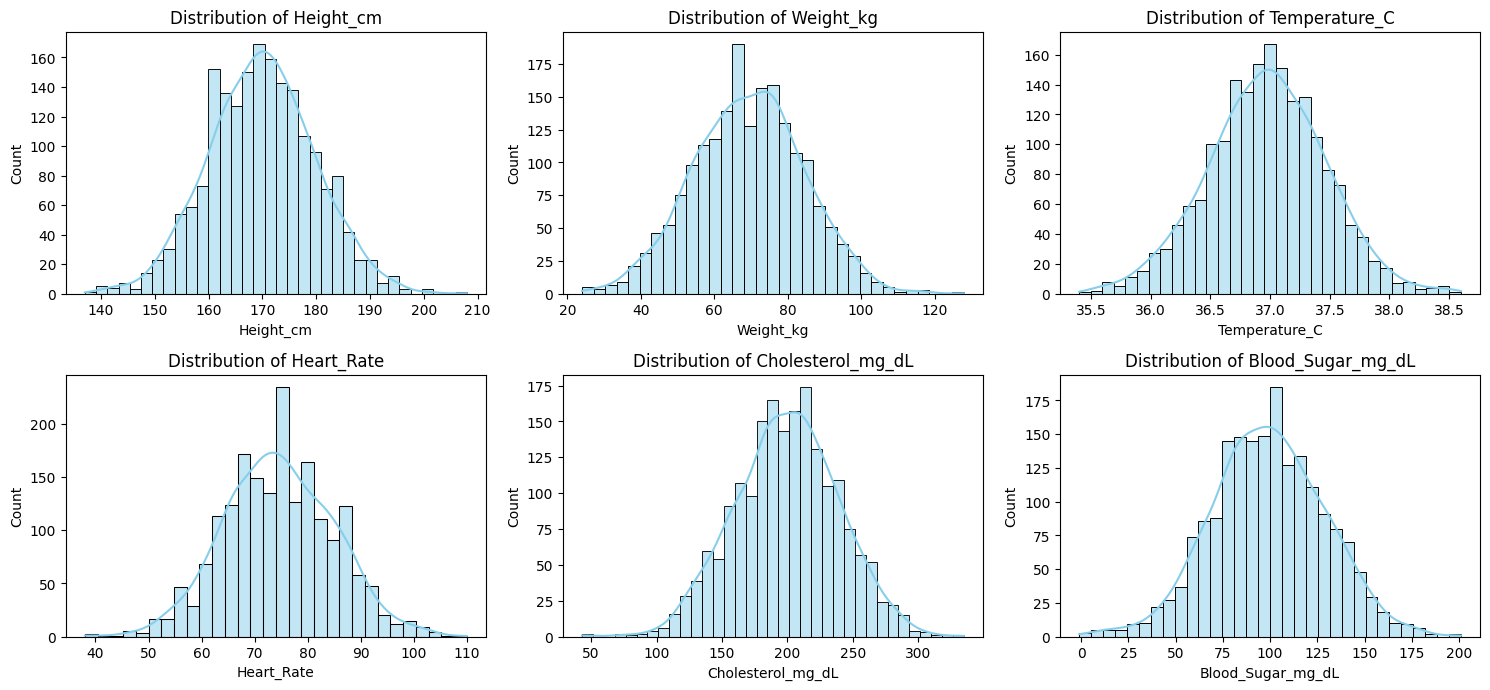

In [13]:
numeric_data = df.select_dtypes(include=['float64', 'int64'])

plt.figure(figsize=(15, 10))
for i, col in enumerate(numeric_data.columns, 1):
    plt.subplot(3, 3, i)
    sns.histplot(numeric_data[col], kde=True, color='skyblue')
    plt.title(f"Distribution of {col}")
plt.tight_layout()
plt.show()

As all the numerical data are in form of Normal distribution hence null values can be replaced by mean values.

In [14]:
for col in num_columns:
        df[col].fillna(df[col].mean(), inplace=True)

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 14 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Patient_ID                    2000 non-null   object 
 1   Height_cm                     2000 non-null   float64
 2   Weight_kg                     2000 non-null   float64
 3   Blood_Pressure                1640 non-null   object 
 4   Temperature_C                 2000 non-null   float64
 5   Heart_Rate                    2000 non-null   float64
 6   Symptoms                      1562 non-null   object 
 7   Existing_Conditions           1488 non-null   object 
 8   Disease_Predictions           1488 non-null   object 
 9   Laboratory_Test_Results       1505 non-null   object 
 10  Cholesterol_mg_dL             2000 non-null   float64
 11  Blood_Sugar_mg_dL             2000 non-null   float64
 12  Family_History_Heart_Disease  1891 non-null   object 
 13  Smo

Checking realtion between different numerical variables

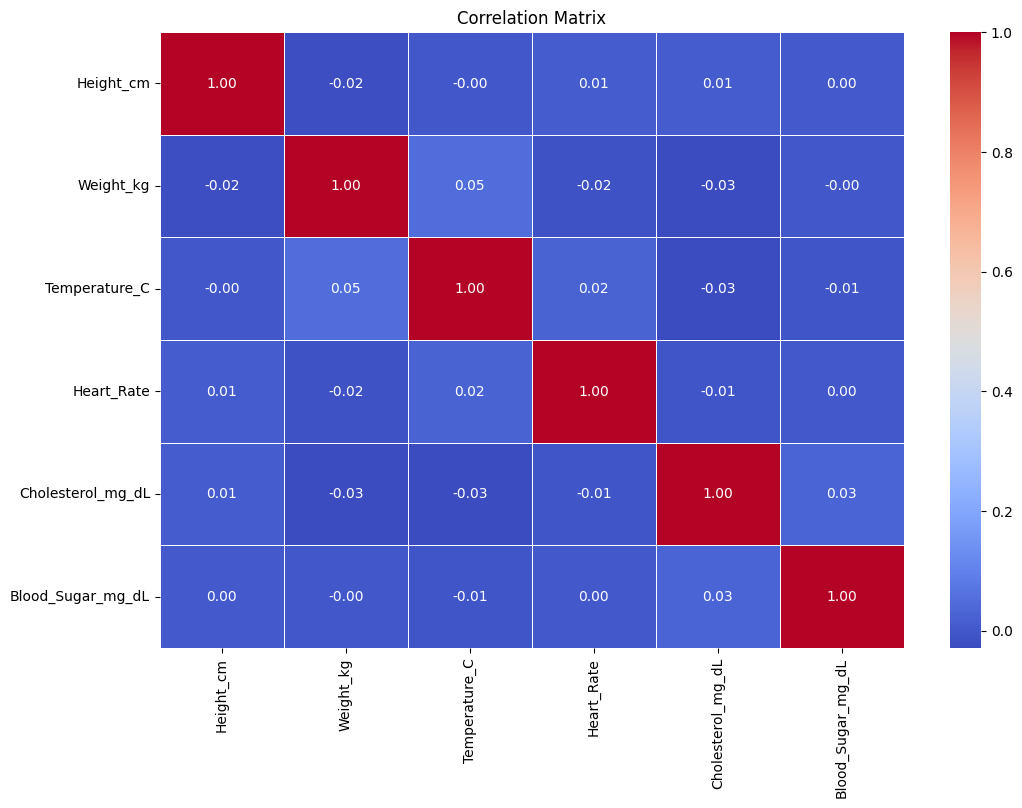

In [16]:
import seaborn as sns
import matplotlib.pyplot as plt

# Select numerical columns from the DataFrame
num_data = df.select_dtypes(include=['float64', 'int64'])

# Compute correlation matrix
correlation_matrix = num_data.corr()

# Display the correlation matrix as a heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Correlation Matrix")
plt.show()


From the above confusion matrix we can see there is a no significant relation between any two columns

In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 14 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Patient_ID                    2000 non-null   object 
 1   Height_cm                     2000 non-null   float64
 2   Weight_kg                     2000 non-null   float64
 3   Blood_Pressure                1640 non-null   object 
 4   Temperature_C                 2000 non-null   float64
 5   Heart_Rate                    2000 non-null   float64
 6   Symptoms                      1562 non-null   object 
 7   Existing_Conditions           1488 non-null   object 
 8   Disease_Predictions           1488 non-null   object 
 9   Laboratory_Test_Results       1505 non-null   object 
 10  Cholesterol_mg_dL             2000 non-null   float64
 11  Blood_Sugar_mg_dL             2000 non-null   float64
 12  Family_History_Heart_Disease  1891 non-null   object 
 13  Smo

As from the dataset we know that the Disease_Predictions is our TARGET VARIABLE.

In [18]:
df["Disease_Predictions"].isnull().sum()

512

In [19]:
df["Existing_Conditions"].unique()

array(['Diabetes', 'Hypertension', 'High Cholesterol', nan, 'Asthma',
       'Thyroid'], dtype=object)

In [20]:
df["Disease_Predictions"].unique()

array(['Heart Disease', 'Coronary Artery Disease', 'Arrhythmia', nan,
       'Hypertension', 'Stroke'], dtype=object)

In [21]:
df["Laboratory_Test_Results"].unique()

array(['High Cholesterol', nan, 'Normal', 'High Blood Sugar', 'Low Iron'],
      dtype=object)

In [22]:
df.groupby('Existing_Conditions')["Disease_Predictions"].value_counts()

Existing_Conditions  Disease_Predictions    
Asthma               Hypertension               266
Diabetes             Heart Disease              269
High Cholesterol     Arrhythmia                 267
Hypertension         Coronary Artery Disease    261
Name: count, dtype: int64

From the above cell we can see there is a realtion between Existing_Conditions and Disease_Predictions Columns.

Hence using Existing_Conditions columns to fill null values of Disease_Predictions column.

In [23]:
# Mapping of 'Existing_Conditions' to 'Disease_Predictions'
condition_to_prediction = {
    'Diabetes': 'Heart Disease',
    'Asthma': 'Hypertension',
    'High Cholesterol': 'Arrhythmia',
    'Hypertension': 'Coronary Artery Disease'
}

# Loop through the dictionary and apply the condition-based assignment
for condition, prediction in condition_to_prediction.items():
    df.loc[(df['Existing_Conditions'] == condition) & (df['Disease_Predictions'].isna()), 'Disease_Predictions'] = prediction


In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 14 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Patient_ID                    2000 non-null   object 
 1   Height_cm                     2000 non-null   float64
 2   Weight_kg                     2000 non-null   float64
 3   Blood_Pressure                1640 non-null   object 
 4   Temperature_C                 2000 non-null   float64
 5   Heart_Rate                    2000 non-null   float64
 6   Symptoms                      1562 non-null   object 
 7   Existing_Conditions           1488 non-null   object 
 8   Disease_Predictions           1611 non-null   object 
 9   Laboratory_Test_Results       1505 non-null   object 
 10  Cholesterol_mg_dL             2000 non-null   float64
 11  Blood_Sugar_mg_dL             2000 non-null   float64
 12  Family_History_Heart_Disease  1891 non-null   object 
 13  Smo

Removing the NULL values of Disease_Predictions columns which is left after data procesing

In [25]:
df = df.dropna(subset=['Disease_Predictions'])

In [26]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1611 entries, 0 to 1999
Data columns (total 14 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Patient_ID                    1611 non-null   object 
 1   Height_cm                     1611 non-null   float64
 2   Weight_kg                     1611 non-null   float64
 3   Blood_Pressure                1320 non-null   object 
 4   Temperature_C                 1611 non-null   float64
 5   Heart_Rate                    1611 non-null   float64
 6   Symptoms                      1254 non-null   object 
 7   Existing_Conditions           1186 non-null   object 
 8   Disease_Predictions           1611 non-null   object 
 9   Laboratory_Test_Results       1211 non-null   object 
 10  Cholesterol_mg_dL             1611 non-null   float64
 11  Blood_Sugar_mg_dL             1611 non-null   float64
 12  Family_History_Heart_Disease  1515 non-null   object 
 13  Smoking_

In [27]:
df[['Blood_Pressure_Systolic', 'Blood_Pressure_Diastolic']]=df['Blood_Pressure'].str.split('/',expand=True)
print(df[['Blood_Pressure_Systolic', 'Blood_Pressure_Diastolic']].head())
df=df.drop(columns="Blood_Pressure")

  Blood_Pressure_Systolic Blood_Pressure_Diastolic
0                     120                       80
1                     130                       85
2                     140                       90
4                     135                       88
6                     NaN                      NaN


In [28]:
df['Blood_Pressure_Systolic']=pd.to_numeric(df['Blood_Pressure_Systolic'], errors='coerce')
df['Blood_Pressure_Diastolic']=pd.to_numeric(df['Blood_Pressure_Diastolic'], errors='coerce')
# Fill NaN values with the mean of each respective column
df['Blood_Pressure_Systolic'].fillna(df['Blood_Pressure_Systolic'].mean(), inplace=True)
df['Blood_Pressure_Diastolic'].fillna(df['Blood_Pressure_Diastolic'].mean(), inplace=True)

print(df[['Blood_Pressure_Systolic', 'Blood_Pressure_Diastolic']].info())

<class 'pandas.core.frame.DataFrame'>
Index: 1611 entries, 0 to 1999
Data columns (total 2 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Blood_Pressure_Systolic   1611 non-null   float64
 1   Blood_Pressure_Diastolic  1611 non-null   float64
dtypes: float64(2)
memory usage: 37.8 KB
None


Filling NULL Values of Categorical values with mode

In [29]:
cat_columns = df.select_dtypes(exclude=[np.number]).columns
for col in cat_columns:
    df[col].fillna(df[col].mode().iloc[0], inplace=True)


In [30]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1611 entries, 0 to 1999
Data columns (total 15 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Patient_ID                    1611 non-null   object 
 1   Height_cm                     1611 non-null   float64
 2   Weight_kg                     1611 non-null   float64
 3   Temperature_C                 1611 non-null   float64
 4   Heart_Rate                    1611 non-null   float64
 5   Symptoms                      1611 non-null   object 
 6   Existing_Conditions           1611 non-null   object 
 7   Disease_Predictions           1611 non-null   object 
 8   Laboratory_Test_Results       1611 non-null   object 
 9   Cholesterol_mg_dL             1611 non-null   float64
 10  Blood_Sugar_mg_dL             1611 non-null   float64
 11  Family_History_Heart_Disease  1611 non-null   object 
 12  Smoking_Status                1611 non-null   object 
 13  Blood_Pr

In [31]:
df.isnull().sum()

Patient_ID                      0
Height_cm                       0
Weight_kg                       0
Temperature_C                   0
Heart_Rate                      0
Symptoms                        0
Existing_Conditions             0
Disease_Predictions             0
Laboratory_Test_Results         0
Cholesterol_mg_dL               0
Blood_Sugar_mg_dL               0
Family_History_Heart_Disease    0
Smoking_Status                  0
Blood_Pressure_Systolic         0
Blood_Pressure_Diastolic        0
dtype: int64

Saving the CLeaned data for futher use.

In [32]:
df.to_csv("Patient_Health_Data_Cleaned.csv", index=False)

In [33]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, OneHotEncoder,StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, accuracy_score

In [34]:
data=pd.read_csv("Patient_Health_Data_Cleaned.csv")

Define features and target

In [35]:
X = data.drop(['Patient_ID','Disease_Predictions'], axis=1)
y = data['Disease_Predictions']

In [36]:
X.columns

Index(['Height_cm', 'Weight_kg', 'Temperature_C', 'Heart_Rate', 'Symptoms',
       'Existing_Conditions', 'Laboratory_Test_Results', 'Cholesterol_mg_dL',
       'Blood_Sugar_mg_dL', 'Family_History_Heart_Disease', 'Smoking_Status',
       'Blood_Pressure_Systolic', 'Blood_Pressure_Diastolic'],
      dtype='object')

Encode categorical variables

Applying One-Hot encoding to categorical features

In [37]:
categorical_columns = X.select_dtypes(include=['object']).columns
numerical_columns = X.select_dtypes(exclude=['object']).columns
encoded_categorical_data = pd.get_dummies(X[categorical_columns], drop_first=True)

X = pd.concat([X[numerical_columns], encoded_categorical_data], axis=1)


In [38]:
X.columns

Index(['Height_cm', 'Weight_kg', 'Temperature_C', 'Heart_Rate',
       'Cholesterol_mg_dL', 'Blood_Sugar_mg_dL', 'Blood_Pressure_Systolic',
       'Blood_Pressure_Diastolic', 'Symptoms_dizziness', 'Symptoms_fatigue',
       'Symptoms_nausea', 'Symptoms_palpitations',
       'Symptoms_shortness of breath', 'Existing_Conditions_Diabetes',
       'Existing_Conditions_High Cholesterol',
       'Existing_Conditions_Hypertension',
       'Laboratory_Test_Results_High Cholesterol',
       'Laboratory_Test_Results_Low Iron', 'Laboratory_Test_Results_Normal',
       'Family_History_Heart_Disease_Yes', 'Smoking_Status_Former',
       'Smoking_Status_Never'],
      dtype='object')

Applying Label encoding for Target variable

In [39]:
l_encoder = LabelEncoder()
y = l_encoder.fit_transform(y)

In [57]:
import pickle
with open('label_encoder.pkl', 'wb') as file:
    pickle.dump(l_encoder, file)

In [40]:
print("Encoded labels:", y)

Encoded labels: [2 1 0 ... 3 2 1]


In [56]:
print("Classes (Original labels):", l_encoder.classes_)

Classes (Original labels): ['Arrhythmia' 'Coronary Artery Disease' 'Heart Disease' 'Hypertension'
 'Stroke']


Train-Test-Validation Split

In [41]:
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.3, random_state=48)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=48)


In [42]:
X_test.shape

(242, 22)

Scale the features

In [43]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_val = scaler.transform(X_val)
X_test = scaler.transform(X_test)

Choosing best k using cross validation for hyperparameter tuning

In [44]:
from sklearn.model_selection import GridSearchCV
param_grid = {'n_neighbors': range(1, 20,2)}  # Testing k values from 1 to 31
knn = KNeighborsClassifier()
grid_search = GridSearchCV(knn, param_grid, cv=5, scoring='accuracy')  # 5-fold cross-validation
grid_search.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': range(1, 20, 2)}, scoring='accuracy')

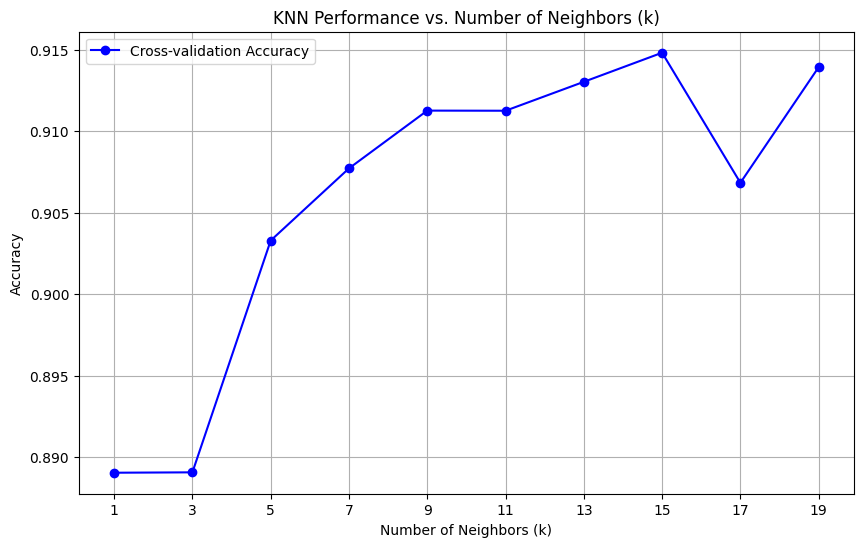

In [45]:
cv_results = grid_search.cv_results_
k_values = range(1, 20,2)
mean_test_scores = cv_results['mean_test_score']

plt.figure(figsize=(10, 6))
plt.plot(k_values, mean_test_scores, marker='o', linestyle='-', color='blue', label='Cross-validation Accuracy')
plt.title('KNN Performance vs. Number of Neighbors (k)')
plt.xlabel('Number of Neighbors (k)')
plt.ylabel('Accuracy')
plt.xticks(k_values)
plt.legend()
plt.grid()
plt.show()

In [46]:
# Step 5: Get the best k
best_k = grid_search.best_params_['n_neighbors']
print(f"Best value of k: {best_k}")

Best value of k: 15


Validate the Model

In [47]:
best_knn = KNeighborsClassifier(n_neighbors=best_k)
best_knn.fit(X_train, y_train)
y_val_pred = best_knn.predict(X_val)
print("Validation Accuracy:", accuracy_score(y_val, y_val_pred))

Validation Accuracy: 0.9132231404958677


Train KNN Model using pipeline

In [48]:
from sklearn.pipeline import Pipeline
pipe= Pipeline([('scaler',StandardScaler()),
                ('model',KNeighborsClassifier(n_neighbors=best_k))])

pipe.fit(X_train,y_train)

Pipeline(steps=[('scaler', StandardScaler()),
                ('model', KNeighborsClassifier(n_neighbors=15))])

Test the Model

In [49]:
y_test_pred = pipe.predict(X_test)
print("Test Accuracy:", accuracy_score(y_test, y_test_pred))

Test Accuracy: 0.9338842975206612


Classification Report

In [50]:
print("\nClassification Report on Test Data:")
print(classification_report(y_test, y_test_pred))


Classification Report on Test Data:
              precision    recall  f1-score   support

           0       1.00      0.88      0.94        50
           1       1.00      0.96      0.98        50
           2       0.84      0.96      0.90        54
           3       0.90      1.00      0.95        52
           4       1.00      0.83      0.91        36

    accuracy                           0.93       242
   macro avg       0.95      0.93      0.93       242
weighted avg       0.94      0.93      0.93       242



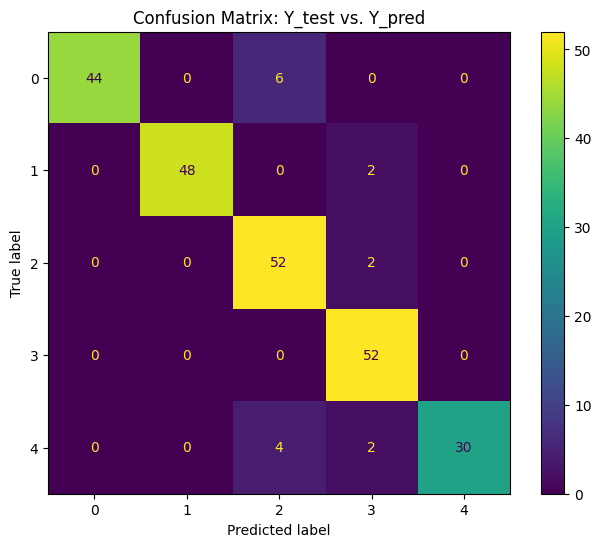

In [51]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
conf_matrix = confusion_matrix(y_test,y_test_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix)
plt.figure(figsize=(8, 6))
disp.plot(cmap="viridis", ax=plt.gca())  # Use the same figure
plt.title("Confusion Matrix: Y_test vs. Y_pred")
plt.show()

Save the trained model to a file

In [52]:
import joblib
joblib.dump(pipe,'hdp_model_pipeline.pkl')

['hdp_model_pipeline.pkl']

Checking the saved model

In [53]:
pl_loaded=joblib.load('hdp_model_pipeline.pkl')
predictions=pl_loaded.predict(X_test)

In [58]:
y_test

array([2, 3, 2, 2, 2, 1, 2, 4, 0, 0, 2, 1, 0, 3, 1, 0, 0, 3, 1, 0, 4, 1,
       0, 2, 0, 0, 3, 2, 3, 2, 2, 1, 3, 0, 0, 3, 3, 3, 0, 1, 3, 1, 4, 4,
       4, 0, 0, 2, 2, 2, 3, 2, 2, 1, 1, 3, 0, 1, 1, 3, 4, 1, 1, 2, 1, 4,
       3, 0, 2, 0, 2, 2, 1, 0, 1, 4, 1, 2, 3, 3, 3, 0, 2, 0, 3, 3, 1, 2,
       3, 4, 4, 0, 1, 3, 2, 0, 3, 1, 3, 2, 4, 2, 2, 2, 0, 1, 1, 1, 1, 4,
       0, 0, 3, 0, 3, 4, 2, 4, 0, 3, 3, 2, 4, 1, 2, 0, 3, 2, 3, 4, 0, 4,
       1, 3, 4, 1, 2, 4, 4, 2, 2, 2, 2, 0, 0, 1, 3, 3, 0, 1, 3, 4, 2, 0,
       1, 1, 0, 2, 0, 1, 4, 3, 0, 1, 2, 3, 2, 4, 0, 4, 0, 0, 4, 3, 0, 1,
       0, 2, 1, 4, 3, 3, 0, 0, 3, 1, 1, 1, 2, 3, 3, 2, 1, 1, 1, 3, 4, 0,
       4, 1, 0, 4, 2, 3, 2, 4, 1, 3, 4, 0, 2, 2, 4, 2, 3, 3, 3, 4, 0, 1,
       1, 1, 2, 4, 1, 3, 4, 3, 2, 0, 2, 3, 2, 4, 1, 1, 0, 3, 2, 3, 0, 2])

In [55]:
print("Test Accuracy:", accuracy_score(y_test, y_test_pred))

Test Accuracy: 0.9338842975206612
